<a href="https://colab.research.google.com/github/nurfnick/Numerical_Methods/blob/master/WeBWorK3HomeworkHelper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeBWork Homework Helper Module 3

## WeBWorK 1

Suppose you want to compute the fifth root of 6 by solving the equation
$$f(x) = x^5 - 6 = 0\quad(*)$$
using Newton's method. Newton's method starts with an initial approximation x_0 and then computes a sequence of approximations $x_1, x_2, x_3, \ldots$ via the formula
$$x_{k+1} = g(x_k), \quad k = 0,1,2,\ldots$$
where
$$g(x) = x - \frac{f(x)}{f'(x)}.$$
$x_0= 1$
you obtain 

In [6]:
def g(x):
  return x-(x**5-6)/(5*x**4)

In [7]:
g(1)

2.0

In [8]:
g(2)

1.675

In [9]:
g(1.675)

1.4924480945749867

Let's automate that a bit...

In [10]:
list = [1]
for i in range(3):
  list.append(g(list[i]))


In [11]:
list

[1, 2.0, 1.675, 1.4924480945749867]

Also let's check the answer, ie is 1.492 a good estimate of $\sqrt[5]6$

In [12]:
6**(1/5)

1.4309690811052556

Not terrible...

## WeBWorK 13

Find the positive value of $x$ that satisfies $x = 2.1 \cos(x)$.
Give the answer to six places of accuracy.

I am going to apply Newton's method to the function $f(x) =2.1\cos(x)-x$.  Newton's method looks for roots!

In [13]:
import math as m

def g1(x):
  return x - (2.1*m.cos(x)-x)/(-2.1*m.sin(x)-1)


In [17]:
list1 = [0]

for i in range(10):
  list1.append(g1(list1[i]))

In [18]:
list1

[0,
 2.1,
 0.9764773173261068,
 1.0492557137084069,
 1.0481918283266316,
 1.0481916182089217,
 1.0481916182089135,
 1.0481916182089135,
 1.0481916182089135,
 1.0481916182089135,
 1.0481916182089135]

Stability of this solution is a good indication this is a solution to the initial problem but make sure to check...

In [19]:
x = 1.048191618

2.1*m.cos(x)

1.0481916185890725

## WeBWorK 29

Find a point P on the graph of
$$x^2+y^2- 182 x + 4 y + 8089 = 0$$
and a point Q on the graph of
$$(y + 2)^2 = x^3 - 156 x^2 - 26 x + 572192$$
such that the distance between them is as small as possible.

To solve this problem, we let $(x,y)$ be the coordinates of the point Q. Then we need to minimize the following function of x and y:

After we eliminate y from the above, we reduce to minimizing the following function of x alone: 


So I am not crazy about the difficulty of this problem, it is pretty hard to visualize.  You should recognize that the graph of P is a circle.  Since it is a circle, the shortest distance to a point will be along a line that contains the center of that circle, here $(91,-2)$ and then you will need to kthrow away the radius of the circle, 14.  So the function we need to minimize is

$$\sqrt{(x-91)^2+(y+2)^2}-14$$

This part should be really similar for eveyone!!!

I'll now replace the $(y+2)^2$ with substitution to find the function to minimize.

$$f(x) = \sqrt{(x-91)^2+x^3-156x^2-26x+572192}-14$$

Recall from calculus that in order to optimize a function, we take its derivative and set it equal to zero.

$$
f'(x) = \frac12\frac{2(x-91)+3x^2-156*2x-26}{\sqrt{(x-91)^2+x^3-156x^2-26x+572192}}=0
$$

The roots from the numerator are found by solving the quadratic
$$
3x^2-310x-208 = 0\quad\text{so}\quad x=\frac{310\pm\sqrt{310^2-4*3*(-208)}}{6}
$$

The difficult roots are the places where the denominator is zero.  Recall these are critical values of the derivative too!  I am going to drop the radical because it will not matter.

Here is the only part I need numerical methods for!  Find the root of
$$
g(x) = (x-91)^2+x^3-156x^2-26x+572192
$$

In [20]:
def g2(x):
  return x-((x-91)**2+x**3-156*x**2-26*x+572192)/(2*(x-91)+3*x**2-156*2*x-26)

In [23]:
list3 = [-50]

for i in range(10):
  list3.append(g2(list3[i]))

In [24]:
list3

[-50,
 -53.43861881361882,
 -53.292299675635036,
 -53.29202795635676,
 -53.292027955420586,
 -53.292027955420586,
 -53.292027955420586,
 -53.292027955420586,
 -53.292027955420586,
 -53.292027955420586,
 -53.292027955420586]

By the way, I need a value close to the actual value so there is some advantage to graphing the original function that I was looking for the roots of.

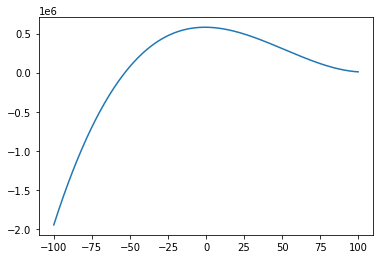

In [25]:


import matplotlib.pyplot as plt
import numpy as np

def gs(x):
  return (x-91)**2+x**3-156*x**2-26*x+572192

x = np.arange( -100,100,.1)
plt.plot(x,gs(x))


plt.show()

